<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Análisis-de-sentimiento" data-toc-modified-id="Análisis-de-sentimiento-0.0.1"><span class="toc-item-num">0.0.1&nbsp;&nbsp;</span>Análisis de sentimiento</a></span></li></ul></li></ul></li><li><span><a href="#Wordcloud" data-toc-modified-id="Wordcloud-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Wordcloud</a></span><ul class="toc-item"><li><span><a href="#Por-tipo-de-comentarios" data-toc-modified-id="Por-tipo-de-comentarios-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Por tipo de comentarios</a></span></li><li><span><a href="#Por-clase-de-hotel" data-toc-modified-id="Por-clase-de-hotel-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Por clase de hotel</a></span></li></ul></li></ul></div>

![](https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg)

El objetivo es analizar las palabras que  más se repiten en función si el comentario es positivo, negativo o neutro y por la clase de hotel.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

In [2]:
comentarios = pd.read_csv("tripadvisor_hotel_reviews.csv")
comentarios.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


**Número de instancias**

In [3]:
print("Nº de instancias:",comentarios.shape[0])

Nº de instancias: 20491


**Tipos de variable**

In [4]:
comentarios.dtypes

Review    object
Rating     int64
dtype: object

**¿Existen valores nulos?**

In [5]:
comentarios.isnull().sum()

Review    0
Rating    0
dtype: int64

**¿Qué clases de hoteles tenemos?**

In [6]:
comentarios.Rating.unique()

array([4, 2, 3, 5, 1], dtype=int64)

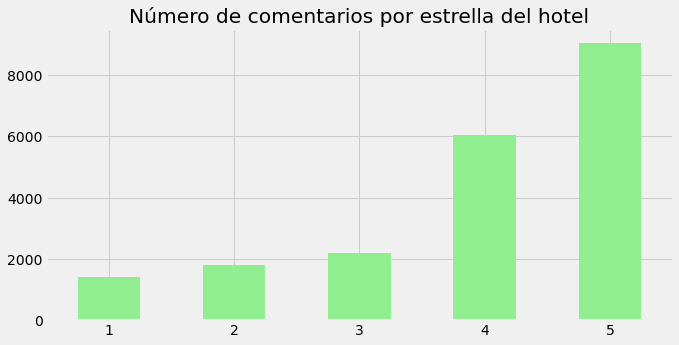

In [7]:
comentarios.Rating.value_counts(sort=False).plot.bar(figsize=(10,5),rot=0,
                                                     title="Número de comentarios por estrella del hotel",
                                                     color="lightgreen")
plt.show()

In [8]:
comentarios.Review[101]

"dump stayed weekend expected charming 1929 property based web-site reviews expedia, did n't expect charming mean incompetent staff showers randomly scalding cold medium pressure just trickle tacky acoustic ceilings moldy non-functional windows shower no screens windows no a/c having room left unlocked maid service having wait 18 hours iron gave 30 minutes make wedding having car 8am parking thought desk reality n't etc. etc.expedia apparantly wo n't publish negative reviews like gather having tried 3 times publish on-line calling customer service exchanging e-mails, beware reviews expedia especially beware hotels like,  "

#### Análisis de sentimiento

In [9]:
from textblob import TextBlob

In [10]:
def analisis_sentimiento(df):
    blob=TextBlob(df.Review)
    sentiment=blob.sentiment.polarity
    return sentiment

In [11]:
%%time
comentarios["SA_ranking"]=comentarios.apply(analisis_sentimiento,axis=1)

Wall time: 9.79 s


In [12]:
comentarios.iloc[np.random.randint(0,comentarios.shape[0],15),]

,Review,Rating,SA_ranking
10433,central hotel agora incredibly central overloo...,3,0.068571
8984,good choice central barcelona 4 nights recentl...,4,0.154903
1410,expensive comfortable visit boston stayed lang...,4,0.247895
18252,"loved place, staying aqua palms amazing experi...",4,0.286111
9434,great location clean boyfriend stayed nights s...,5,0.404034
16949,issues resolved jurys issue stay great hotel n...,5,0.340877
15940,"loved hotel great hotel, not orchard road step...",4,0.270161
13925,pleasant place price right silver cloud broadw...,4,0.367167
12515,"not husband went honeymoon, say n't impressed,...",1,0.191667
6988,fantastic stayed excellence punta cana februar...,4,0.259444


**Comentario más positivo**

In [13]:
cmp = comentarios.iloc[comentarios.SA_ranking.idxmax]
print("Clase de hotel:",cmp.Rating)
cmp.Review

Clase de hotel: 5


'absolutely wonderful wonderful serene oasis city millions, steps away times square entering hotel peacefulness eveloping, lounge wonderful treat morning afternoon, wonderful treated meet travellers business people share experiences.loved,  '

**Comentario más negativo**

In [14]:
cmn = comentarios.iloc[comentarios.SA_ranking.idxmin]
print("Clase de hotel:",cmn.Rating)
cmn.Review

Clase de hotel: 1


'worst location does say place eat sub place, make order bullet proof glass,  '

**Categorizando los comentarios**

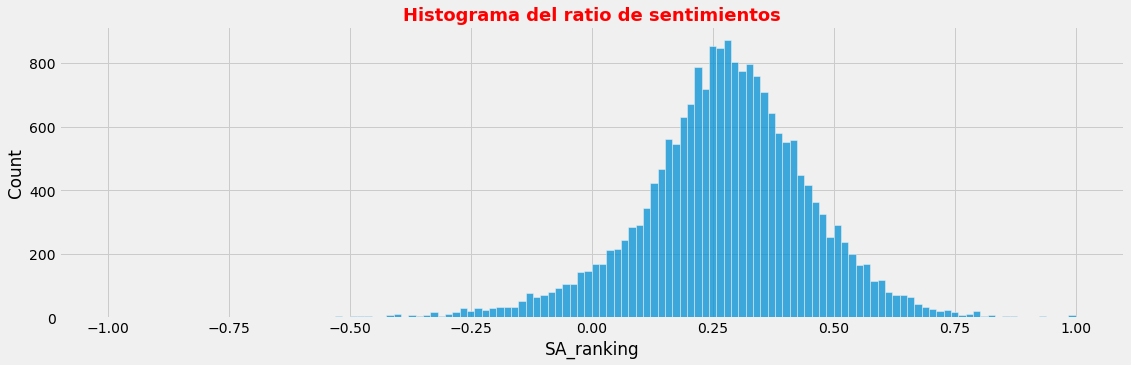

In [15]:
plt.figure(figsize=(17,5))
plt.title("Histograma del ratio de sentimientos",fontsize=18,color='red',fontweight="bold")
sns.histplot(comentarios.SA_ranking)
plt.show()

In [16]:
def sentiment(ratio):
    if ratio <=-0.01:
        return "negative"
    elif ratio >=0.10:
        return "positive"
    else: return "neutral"
comentarios["Sentiment"]=comentarios['SA_ranking'].apply(lambda x: sentiment(x))

In [17]:
comentarios.iloc[np.random.randint(0,comentarios.shape[0],15),:]

,Review,Rating,SA_ranking,Sentiment
1311,oasis civilization sea humanity hotel matches ...,5,0.466484,positive
20282,perfect chinese hotel stayed sihe hotel family...,5,0.418000,positive
1025,excellent hotel great location lovely boutique...,4,0.586905,positive
11701,nice place good value money wife recently stay...,5,0.605208,positive
19020,tiny single room disadvantage spent nights mar...,3,0.219048,positive
8960,"not worth money stayed christmas new year, boo...",2,0.015791,neutral
18596,3 late 20s/early 30s couples annual trip time ...,3,0.257197,positive
6199,nice hotel husband stayed hotel night going cr...,4,0.173810,positive
19617,hard fault say primarily hotel stayed wife 10 ...,5,0.310963,positive
11386,loved manny santiago family stayed twice las c...,5,0.464286,positive


In [18]:
comentarios["Sentiment"].value_counts()

positive    17664
neutral      1562
negative     1265
Name: Sentiment, dtype: int64

De cada 20 comentarios 1 es negativo

In [19]:
resumen={}
SENTIMENTS = ["positive","negative","neutral"]
for sentiment in SENTIMENTS:
    resumen[sentiment]= comentarios[comentarios["Sentiment"]==sentiment].Rating.value_counts()
resumen=pd.DataFrame(resumen)

In [20]:
resumen

,positive,negative,neutral
1,289,766,366
2,879,342,572
3,1759,109,316
4,5805,30,204
5,8932,18,104


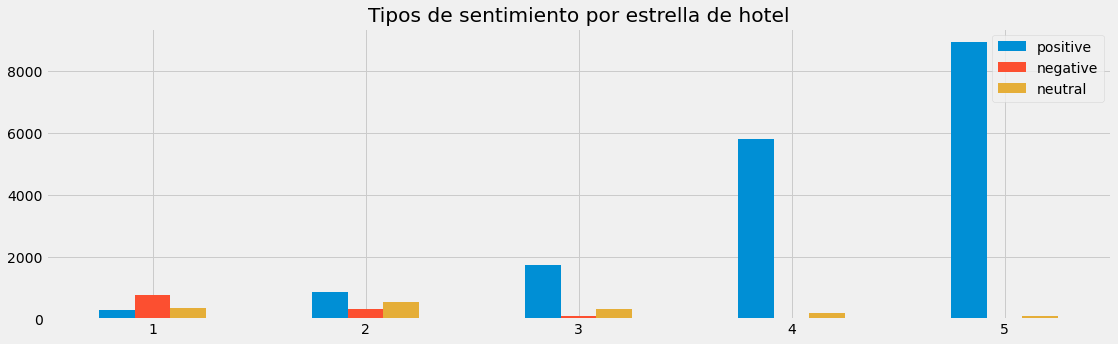

In [21]:
resumen.plot(kind="bar",figsize=(17,5),rot=0,title="Tipos de sentimiento por estrella de hotel")
plt.show()

- El volumen de comentarios positivos crece exponencialmente a medida que el hotel tiene más estrellas. 
- Solo se aprecian comentarios negativos en hoteles menores a cuatro estrellas y de forma decreciente.
- Los comentarios neutros tiene un ligero pico en hoteles de dos estrellas.

**Haciendo un filtro**

In [22]:
import ipywidgets as wg
from IPython.display import display
palabra = wg.Text(value='palabra a buscar sin paréntesis')

Text(value='boring')

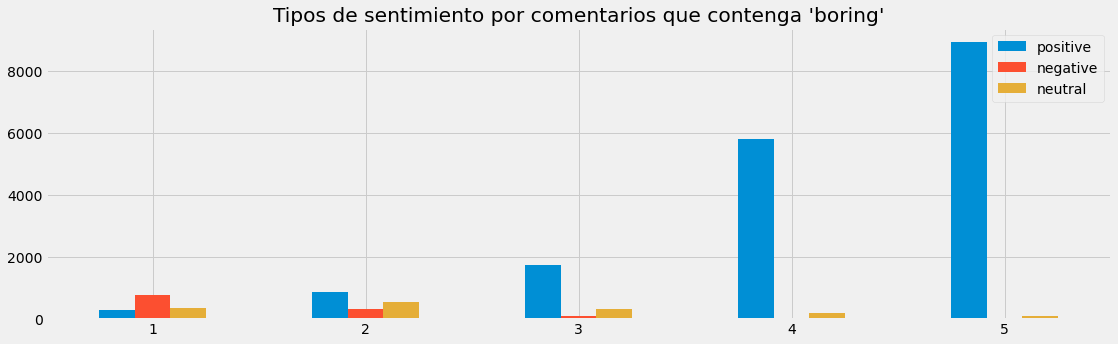

TOTAL: 193 comentarios


,Review,Rating,SA_ranking,Sentiment
15334,raffles quite nice not bad price staying raffl...,5,0.216905,positive
12344,different experience reading mixed reviews tho...,4,0.339493,positive
19456,palacial property lacking lot things rppc week...,2,0.155833,positive
18265,"overall good experience great place relax, hus...",3,0.170374,positive
14103,"fantastic, hotel absolutely brilliant, greeted...",5,0.269048,positive
3669,fantastic holiday went dominicana 4th october ...,4,0.303476,positive
3826,enjoyed riu taino thoroughly empressed riu tai...,5,0.200959,positive
2749,"nice resort lots careful eat, wife just return...",3,0.132804,positive
4043,"wonderfull beautifull boring, service excellen...",5,0.330000,positive
18922,not place quiet getaway just returned staying ...,4,-0.020403,negative


In [24]:
display(palabra)
word=palabra.value
comentarios_filtro=comentarios[comentarios.Review.str.contains(word,regex=False)]
res={}
for sentiment in SENTIMENTS:
    res[sentiment]= comentarios[comentarios["Sentiment"]==sentiment].Rating.value_counts()
res=pd.DataFrame(resumen)
res.plot(kind="bar",figsize=(17,5),rot=0,title="Tipos de sentimiento por comentarios que contenga '{}'".format(word))
plt.show()
print("TOTAL:",comentarios_filtro.shape[0],"comentarios")
comentarios_filtro.iloc[np.random.randint(0,comentarios_filtro.shape[0],20),:]

In [25]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
def chequeo(n):
    com= comentarios.iloc[n,].Review
    com=com.replace(word,"{0}{1}{2}{3}{4}".format(color.BOLD,color.RED,color.UNDERLINE,word,color.END))
    return com
print(chequeo(18922))

not place quiet getaway just returned staying hotel enoyed holiday bad points, hotel drive past building sites, entrance hotel usual open building based main bar area, opens town square area set 2 small lakes, consists restaurants la bodegon italian restaurant route 66 american themed retaurant sports bar mexican restaurant la casa restaurant, casino bowling alley shops entertainment theatre, opens main buffet restaurants follows tree lined avenue musical rocks leads 2 pools jacuzzis beach restaurants bars.the rooms initally placed ground floor room villa 8 overlooking service road, warned rooms badly lit bad unpack didnt bother, asked relocated thanks travel rep eventually moved villa 5 overlooking pool area room number 5217. lot lighter room furniture cream not dark wood lighting poor room hard apply make, villa 2 sides divided internal courtyard water features plants, room shower jacuzzi heard lots complaints pressure temperature didnt problems shower, rooms cleaned well.the pools 2

## Wordcloud

### Por tipo de comentarios

In [26]:
def adjuntar_texto(df):
    texto=df.Review.to_list()
    texto_lista=list(filter(None,texto))
    texto_cadena=" ".join(map(str,texto_lista))
    return texto_cadena

In [27]:
def adjuntar_texto(df):
    text = " ".join(i for i in df.Review)
    return text

In [28]:
for sentiment in SENTIMENTS:
    exec(f"{sentiment}_texto=adjuntar_texto(comentarios[comentarios.Sentiment=='{sentiment}'])")

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stop_w = set(STOPWORDS)
stop_w=stop_w.union({"s","room","hotel","going","day","n't"})#palabras comunes e irrelevantes
fontdict={'color':'red','size':'29','fontweight':'bold'}

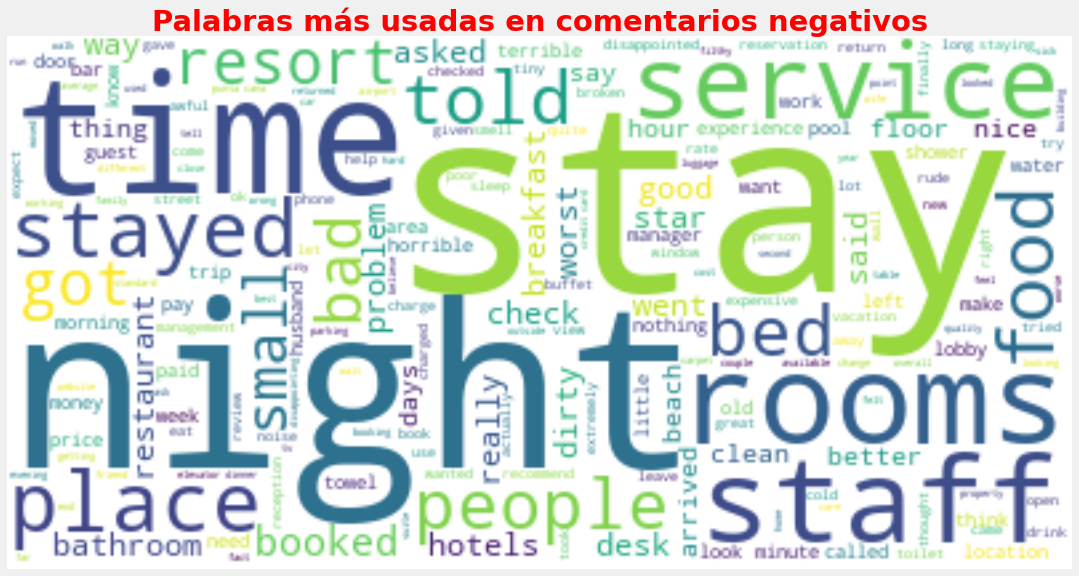

In [30]:
word_cloud = WordCloud(stopwords=stop_w,background_color="white").generate(negative_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios negativos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

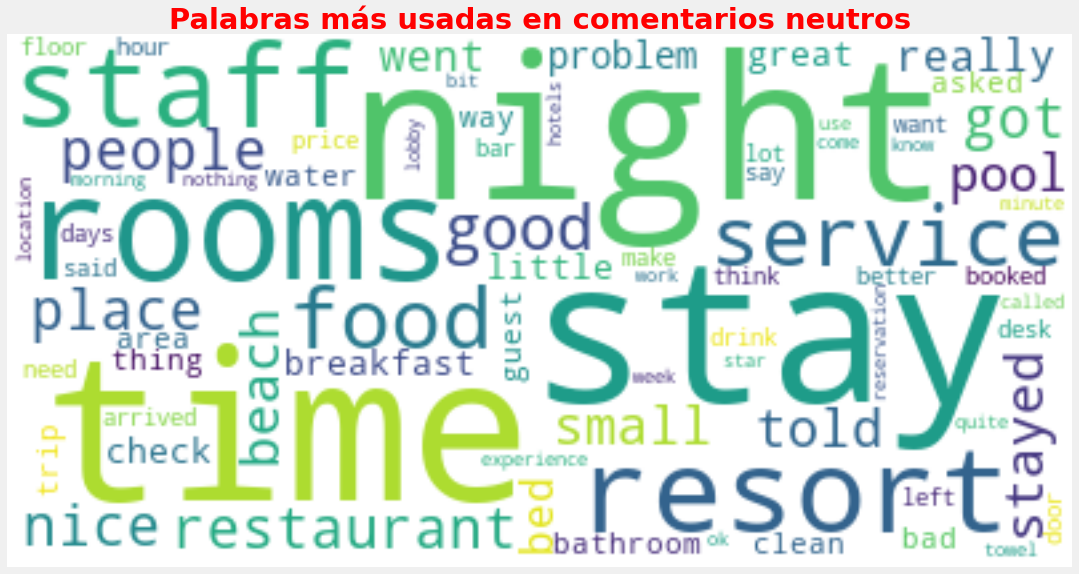

In [31]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(neutral_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios neutros",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

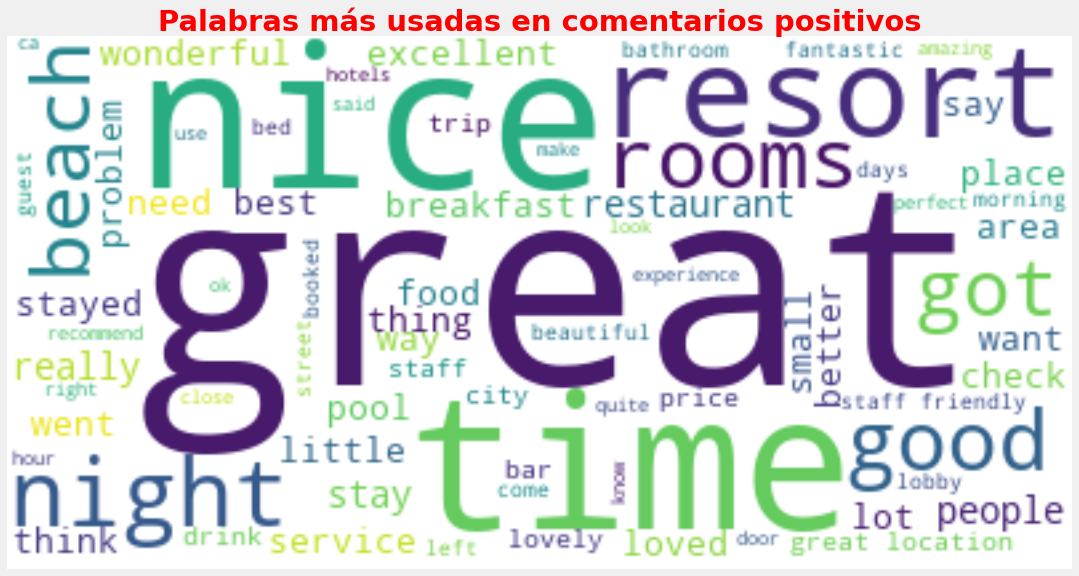

In [32]:
word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white").generate(positive_texto)
plt.figure(figsize=(17,10))
plt.title("Palabras más usadas en comentarios positivos",fontdict=fontdict)
plt.axis("off")
plt.imshow(word_cloud,interpolation="bilinear")
plt.show()

### Por clase de hotel

In [33]:
from PIL import Image

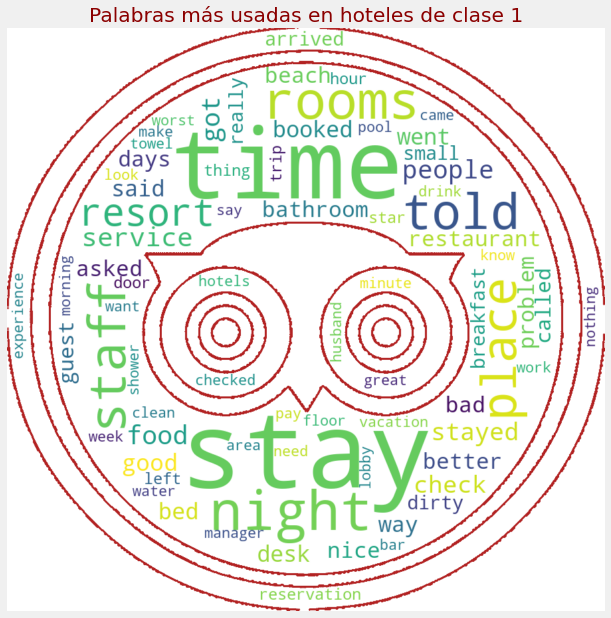

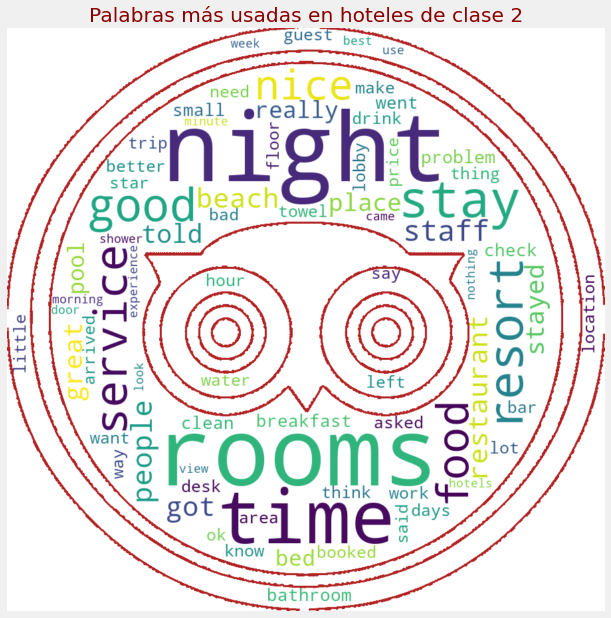

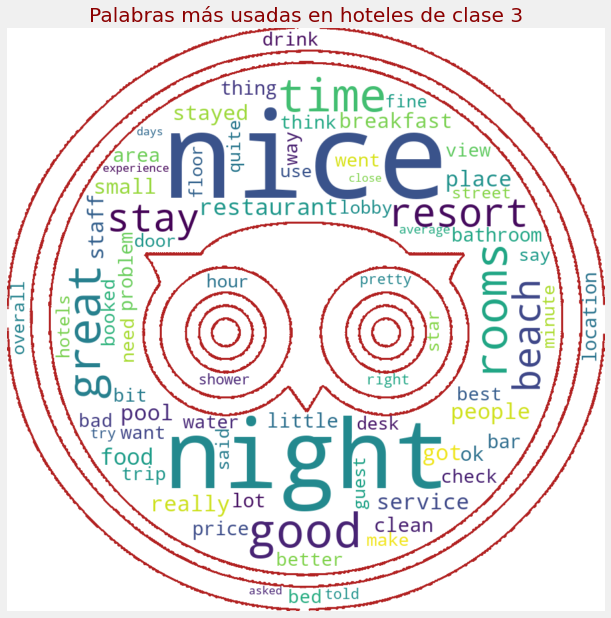

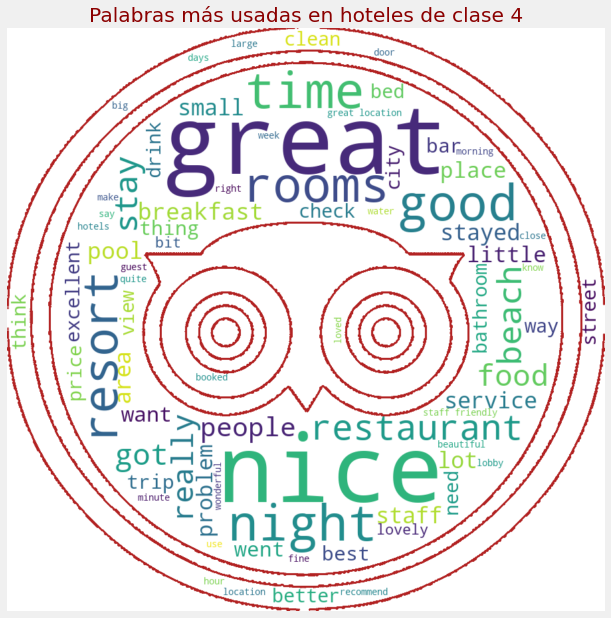

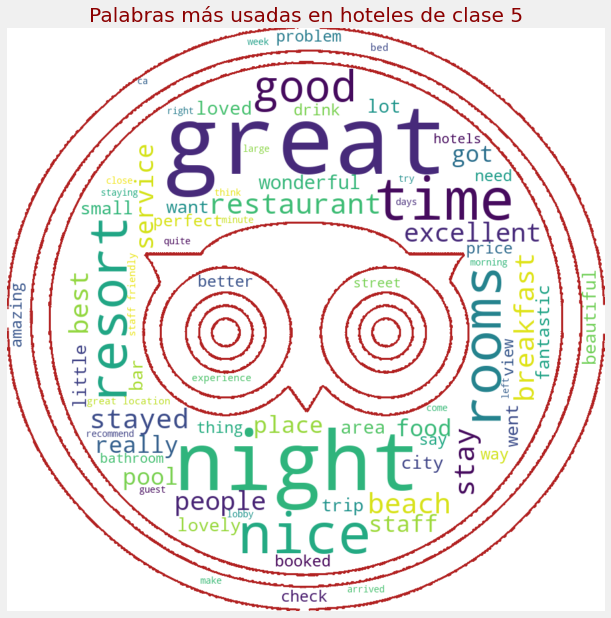

Wall time: 12 s


In [34]:
%%time
mask = np.array(Image.open("tripadvisor-logo.png"))
mask[(mask!=255) & (mask!=0)]=255
for i in range(1,6):
    comentarios_tipo_hotel=comentarios[comentarios["Rating"]==i]
    texto=adjuntar_texto(comentarios_tipo_hotel)
    word_cloud = WordCloud(stopwords=stop_w,max_words=75, background_color="white",mask=mask,
                           contour_width=3,contour_color='firebrick',max_font_size=256,random_state=1)
    word_cloud.generate(texto)
    plt.figure(figsize=(15,10))
    plt.title("Palabras más usadas en hoteles de clase {}".format(i),fontdict={'color':'darkred'})
    plt.imshow(word_cloud,interpolation="bilinear")
    plt.axis("off")
    plt.show()